# Lecture 5: Feature grammars and logical semantics
Computational Linguistics I
Spring 2023

The reading is Chapter 9 of the NLTK book.
Some examples and example grammars come from that chapter.

I didn't get the tree display to work with python10. The lecture uses python3.6.

In [7]:
from platform import python_version

In [8]:
python_version()

'3.6.15'

### Introduction -- grammar with number agreement

In [9]:
import nltk
from nltk import grammar, parse
from nltk.parse.generate import generate

In [10]:
 nltk.data.show_cfg('grammars/book_grammars/feat0.fcfg')

% start S
# ###################
# Grammar Productions
# ###################
# S expansion productions
S -> NP[NUM=?n] VP[NUM=?n]
# NP expansion productions
NP[NUM=?n] -> N[NUM=?n] 
NP[NUM=?n] -> PropN[NUM=?n] 
NP[NUM=?n] -> Det[NUM=?n] N[NUM=?n]
NP[NUM=pl] -> N[NUM=pl] 
# VP expansion productions
VP[TENSE=?t, NUM=?n] -> IV[TENSE=?t, NUM=?n]
VP[TENSE=?t, NUM=?n] -> TV[TENSE=?t, NUM=?n] NP
# ###################
# Lexical Productions
# ###################
Det[NUM=sg] -> 'this' | 'every'
Det[NUM=pl] -> 'these' | 'all'
Det -> 'the' | 'some' | 'several'
PropN[NUM=sg]-> 'Kim' | 'Jody'
N[NUM=sg] -> 'dog' | 'girl' | 'car' | 'child'
N[NUM=pl] -> 'dogs' | 'girls' | 'cars' | 'children' 
IV[TENSE=pres,  NUM=sg] -> 'disappears' | 'walks'
TV[TENSE=pres, NUM=sg] -> 'sees' | 'likes'
IV[TENSE=pres,  NUM=pl] -> 'disappear' | 'walk'
TV[TENSE=pres, NUM=pl] -> 'see' | 'like'
IV[TENSE=past] -> 'disappeared' | 'walked'
TV[TENSE=past] -> 'saw' | 'liked'


Number is expressed in the determiner (this/these), the noun (dog/dogs)
and the verb (like/likes). The feature grammar matches number.

In [11]:
cp = nltk.load_parser('grammars/book_grammars/feat0.fcfg', trace=0)
dog_sg_sg_sg = 'this dog likes children'.split()
for tree in cp.parse(dog_sg_sg_sg): print(tree)

(S[]
  (NP[NUM='sg'] (Det[NUM='sg'] this) (N[NUM='sg'] dog))
  (VP[NUM='sg', TENSE='pres']
    (TV[NUM='sg', TENSE='pres'] likes)
    (NP[NUM='pl'] (N[NUM='pl'] children))))


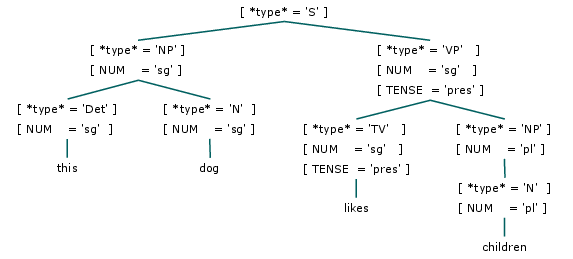

In [12]:
t1 = next(cp.parse(dog_sg_sg_sg))
t1

The following has no trees because of a number mismatch.

In [13]:
dog_sg_sg_pl = 'this dog like children'.split()
for tree in cp.parse(dog_sg_sg_pl): print(tree)

In [14]:
dog_pl_pl_pl = 'these dogs like children'.split()
for tree in cp.parse(dog_pl_pl_pl): print(tree)

(S[]
  (NP[NUM='pl'] (Det[NUM='pl'] these) (N[NUM='pl'] dogs))
  (VP[NUM='pl', TENSE='pres']
    (TV[NUM='pl', TENSE='pres'] like)
    (NP[NUM='pl'] (N[NUM='pl'] children))))


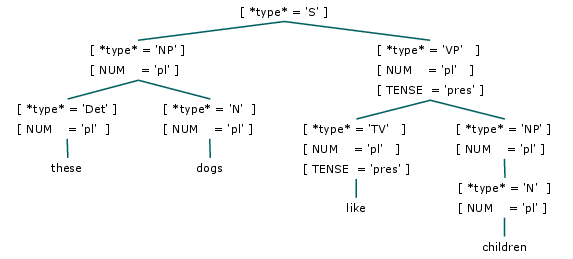

In [15]:
next(cp.parse(dog_pl_pl_pl))

## Semantics
simple-sem.fcfg

In [16]:
 nltk.data.show_cfg('grammars/book_grammars/simple-sem.fcfg')

% start S
# Grammar Rules
S[SEM = <?subj(?vp)>] -> NP[NUM=?n,SEM=?subj] VP[NUM=?n,SEM=?vp]
NP[NUM=?n,SEM=<?det(?nom)> ] -> Det[NUM=?n,SEM=?det]  Nom[NUM=?n,SEM=?nom]
NP[LOC=?l,NUM=?n,SEM=?np] -> PropN[LOC=?l,NUM=?n,SEM=?np]
Nom[NUM=?n,SEM=?nom] -> N[NUM=?n,SEM=?nom]
VP[NUM=?n,SEM=?v] -> IV[NUM=?n,SEM=?v]
VP[NUM=?n,SEM=<?v(?obj)>] -> TV[NUM=?n,SEM=?v] NP[SEM=?obj]
VP[NUM=?n,SEM=<?v(?obj,?pp)>] -> DTV[NUM=?n,SEM=?v] NP[SEM=?obj] PP[+TO,SEM=?pp]
PP[+TO, SEM=?np] -> P[+TO] NP[SEM=?np]
# Lexical Rules
PropN[-LOC,NUM=sg,SEM=<\P.P(angus)>] -> 'Angus'
PropN[-LOC,NUM=sg,SEM=<\P.P(cyril)>] -> 'Cyril'
PropN[-LOC,NUM=sg,SEM=<\P.P(irene)>] -> 'Irene'
Det[NUM=sg,SEM=<\P Q.all x.(P(x) -> Q(x))>] -> 'every'
Det[NUM=pl,SEM=<\P Q.all x.(P(x) -> Q(x))>] -> 'all'
Det[SEM=<\P Q.exists x.(P(x) & Q(x))>] -> 'some'
Det[NUM=sg,SEM=<\P Q.exists x.(P(x) & Q(x))>] -> 'a'
Det[NUM=sg,SEM=<\P Q.exists x.(P(x) & Q(x))>] -> 'an'
N[NUM=sg,SEM=<\x.man(x)>] -> 'man'
N[NUM=sg,SEM=<\x.girl(x)>] -> 'girl'
N[NUM=sg,SEM=<\x.b

In [18]:
sp2 = nltk.load_parser('grammars/book_grammars/simple-sem.fcfg', trace=0)

In [19]:
s1 = 'Angus chases Cyril'.split()
for tree in sp2.parse(s1): print(tree)

(S[SEM=<chase(angus,cyril)>]
  (NP[-LOC, NUM='sg', SEM=<\P.P(angus)>]
    (PropN[-LOC, NUM='sg', SEM=<\P.P(angus)>] Angus))
  (VP[NUM='sg', SEM=<\x.chase(x,cyril)>]
    (TV[NUM='sg', SEM=<\X x.X(\y.chase(x,y))>, TNS='pres'] chases)
    (NP[-LOC, NUM='sg', SEM=<\P.P(cyril)>]
      (PropN[-LOC, NUM='sg', SEM=<\P.P(cyril)>] Cyril))))


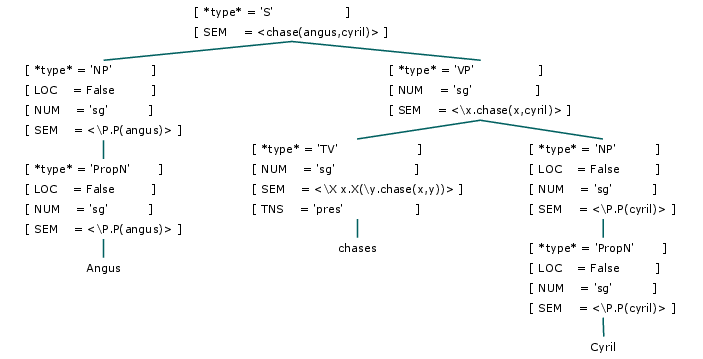

In [21]:
t1 = next(sp2.parse(s1))
t1

$\lambda y . \lambda x . \mbox{chase}(x,y)$

$\lambda x . \mbox{happy}(x)$

$\lambda x . \mbox{chase}(x,\mbox{cyril})$

(S[SEM=<exists x.(dog(x) & chase(x,cyril))>]
  (NP[NUM='sg', SEM=<\Q.exists x.(dog(x) & Q(x))>]
    (Det[SEM=<\P Q.exists x.(P(x) & Q(x))>] some)
    (Nom[NUM='sg', SEM=<\x.dog(x)>]
      (N[NUM='sg', SEM=<\x.dog(x)>] dog)))
  (VP[NUM='sg', SEM=<\x.chase(x,cyril)>]
    (TV[NUM='sg', SEM=<\X x.X(\y.chase(x,y))>, TNS='pres'] chases)
    (NP[-LOC, NUM='sg', SEM=<\P.P(cyril)>]
      (PropN[-LOC, NUM='sg', SEM=<\P.P(cyril)>] Cyril))))


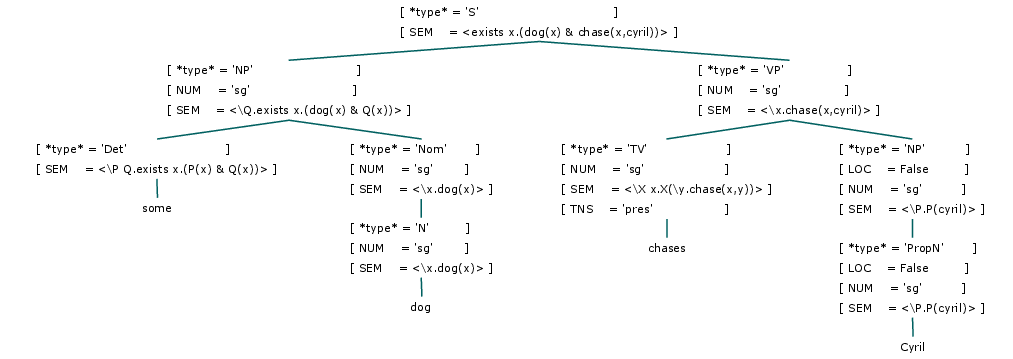

In [25]:
s2 = 'some dog chases Cyril'.split()
t1=next(sp2.parse(s2))
print(t1)
t1

In [28]:
t1=next(sp2.parse(s2))
print(t1.label()['SEM'])

exists x.(dog(x) & chase(x,cyril))


In [30]:
s3 = 'every dog chases Cyril'.split()
t3=next(sp2.parse(s3))
print(t3.label()['SEM'])

all x.(dog(x) -> chase(x,cyril))


### Finding feature values
Select a subtree `u` with the address notation.
The find the feature with the notation `u.label()[F]`.
The feature name is quoted.

sg
sg


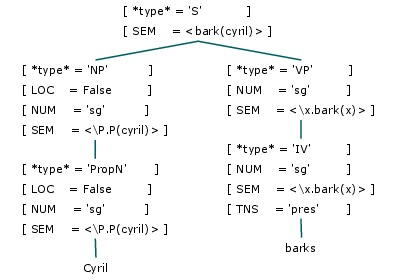

In [32]:
s4 = 'Cyril barks'.split()
t1 = next(sp2.parse(s4))
print(t1[(0,)].label()['NUM'])
print(t1[(1,)].label()['NUM'])
t1

In [55]:
print(t1[(0,)].label()['SEM'])
print(t1[(1,)].label()['SEM'])

\P.P(cyril)
\x.bark(x)


How to print the syntactic category like NP?  I did not find it.

\Q.all x.(dog(x) -> Q(x))


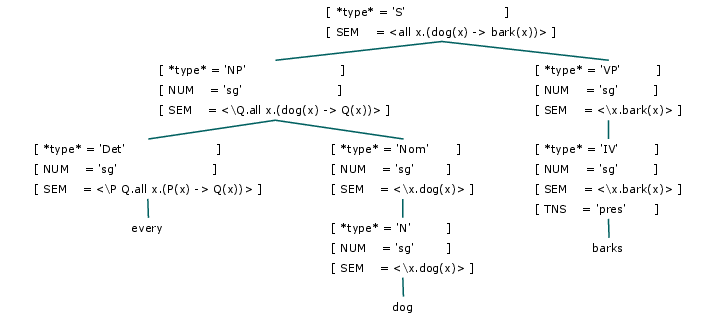

In [57]:
s4 = 'every dog barks'.split()
t1 = next(sp2.parse(s4))
print(t1[(0,)].label()['SEM'])
t1

In [58]:
print(t1.label()['SEM'])

all x.(dog(x) -> bark(x))


In [59]:
print(t1[(1,)].label()['SEM'])

\x.bark(x)


$[\lambda Q.\forall x.dog(x) \rightarrow Q(x)] (\lambda x.bark(x) )$ 

simplifies by beta reduction to 
 
$\forall x.dog(x) \rightarrow bark(x)$

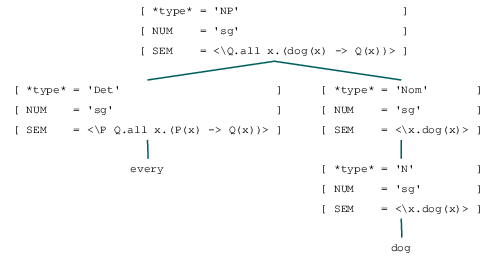

In [47]:
t1[(0,)]

In [173]:
print(t1[(0,)].label()['SEM'])

\Q.exists x.(dog(x) & Q(x))


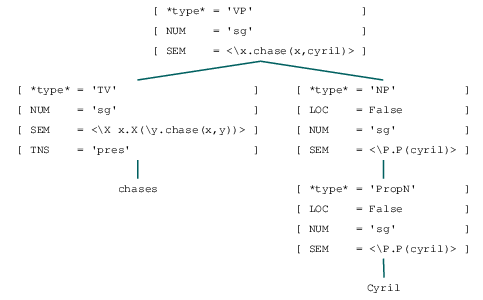

In [48]:
t1[(1,)]

In [49]:
t1.label()

S[SEM=<all x.(dog(x) -> chase(x,cyril))>]

In [35]:
t1.label()['SEM']

<AllExpression all x.(dog(x) -> chase(x,cyril))>

In [36]:
print(t1.label()['SEM'])

all x.(dog(x) -> chase(x,cyril))


In [37]:
type(t1.label()['SEM'])

nltk.sem.logic.AllExpression

In [38]:
print(t1[(0,)].label()['SEM'])

\Q.all x.(dog(x) -> Q(x))


$\lambda Q.\forall x.\mbox{dog}(x) \rightarrow Q(x)$

### Verb with three arguments

In [76]:
s2 = 'Angus gives Cyril to Irene'.split()
s2t = next(sp2.parse(s2))
print(s2t.label()['SEM'])

give(angus,cyril,irene)


***Find the semantics of the parts***

***Include embedded quantifiers***

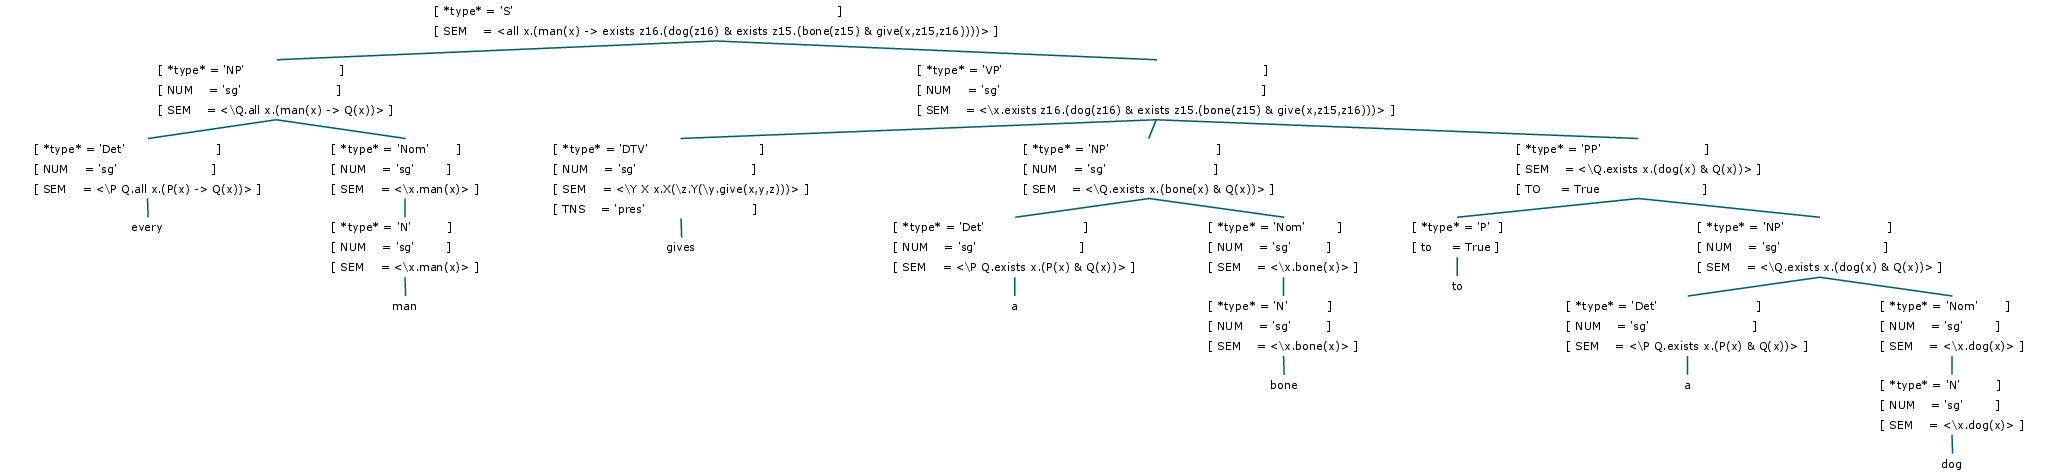

In [81]:
s3 = 'every man gives a bone to a dog'.split()
t3=next(sp2.parse(s3))
t3

In [82]:
print(t3.label()['SEM'])

all x.(man(x) -> exists z16.(dog(z16) & exists z15.(bone(z15) & give(x,z15,z16))))


$ \exists z_{10}.\mbox{dog}(z_{10}) ... $

### Semantic types

In [72]:
print(t1.label()['SEM'])
t1.label()['SEM'].typecheck()

exists z6.(dog(z6) & exists z5.(bone(z5) & give(angus,z5,z6)))


{'z6': e,
 'dog': <e,t>,
 'z5': e,
 'bone': <e,t>,
 'angus': e,
 'give': <e,<e,<e,t>>>}

Correspondence with arrow notation for types of functions, as used in CS.

\begin{array}{lll}
z_6 & e & E \\
dog & <e,t> & E \rightarrow T \\
continue ... \\\
\end{array}

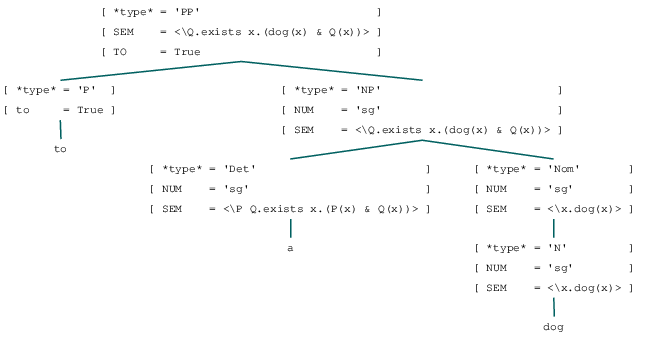

In [116]:
t1[(1,2)]

In [119]:
print(t1[(1,2)].label()['SEM'])

\Q.exists x.(dog(x) & Q(x))


In [73]:
sp4 = load_parser('grammars/cornell_grammars/g1.fcfg', trace=0)

NameError: name 'load_parser' is not defined

In [126]:
s1 = 'Angus chases Beryl'.split()
for tree in sp4.parse(s1): print(tree)

(S[SEM=<chase(angus,beryl)>]
  (NP[-LOC, NUM='sg', SEM=<\P.P(angus)>]
    (PropN[-LOC, NUM='sg', SEM=<\P.P(angus)>] Angus))
  (VP[NUM='sg', SEM=<\x.chase(x,beryl)>]
    (TV[NUM='sg', SEM=<\X x.X(\y.chase(x,y))>, TNS='pres'] chases)
    (NP[-LOC, NUM='sg', SEM=<\P.P(beryl)>]
      (PropN[-LOC, NUM='sg', SEM=<\P.P(beryl)>] Beryl))))


In [41]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
import sympy as sym
x = sym.symbols('x')
I = sym.integrate(1/(1+x**2), (x, 0, 1))
equation = r'$$\int_{{t=0}}^1 \frac{{1}}{{1+t^2}}\,\text{d}t$$'
printmd('**THE EQUATION:**')
printmd(f'{equation}')
printmd('**THE RESULT:**')
printmd(f'$$ = {sym.latex(I)}$$')
printmd('**COMBINED:**')
printmd(r'$$\int_{{t=0}}^1 \frac{{1}}{{1+t^2}}\,\text{d}t' + f' = {sym.latex(I)}$$')
printmd('**OR, COMBINED:**')
printmd(equation[:-2] + f' = {sym.latex(I)}$$')

ModuleNotFoundError: No module named 'sympy'

### Local copy

In [127]:
nltk.data.retrieve('grammars/book_grammars/simple-sem.fcfg', '/local/teach/cl21/grammar/simple-sem.fcfg')

Retrieving 'nltk:grammars/book_grammars/simple-sem.fcfg', saving to '/local/teach/cl21/grammar/simple-sem.fcfg'


In [130]:
import os
os.path.abspath('/local/teach/cl21/grammar/simple-sem.fcfg')

'/local/teach/cl21/grammar/simple-sem.fcfg'

In [132]:
fcfg = nltk.data.load('file:///'
  + os.path.abspath('/local/teach/cl21/grammar/simple-sem.fcfg'))

In [134]:
print(fcfg)

Grammar with 37 productions (start state = S[])
    S[SEM=<?subj(?vp)>] -> NP[NUM=?n, SEM=?subj] VP[NUM=?n, SEM=?vp]
    NP[NUM=?n, SEM=<?det(?nom)>] -> Det[NUM=?n, SEM=?det] Nom[NUM=?n, SEM=?nom]
    NP[LOC=?l, NUM=?n, SEM=?np] -> PropN[LOC=?l, NUM=?n, SEM=?np]
    Nom[NUM=?n, SEM=?nom] -> N[NUM=?n, SEM=?nom]
    VP[NUM=?n, SEM=?v] -> IV[NUM=?n, SEM=?v]
    VP[NUM=?n, SEM=<?v(?obj)>] -> TV[NUM=?n, SEM=?v] NP[SEM=?obj]
    VP[NUM=?n, SEM=<?v(?obj,?pp)>] -> DTV[NUM=?n, SEM=?v] NP[SEM=?obj] PP[SEM=?pp, +TO]
    PP[SEM=?np, +TO] -> P[+TO] NP[SEM=?np]
    PropN[-LOC, NUM='sg', SEM=<\P.P(angus)>] -> 'Angus'
    PropN[-LOC, NUM='sg', SEM=<\P.P(cyril)>] -> 'Cyril'
    PropN[-LOC, NUM='sg', SEM=<\P.P(irene)>] -> 'Irene'
    PropN[-LOC, NUM='sg', SEM=<\P.P(beryl)>] -> 'Beryl'
    Det[NUM='sg', SEM=<\P Q.all x.(P(x) -> Q(x))>] -> 'every'
    Det[NUM='pl', SEM=<\P Q.all x.(P(x) -> Q(x))>] -> 'all'
    Det[SEM=<\P Q.exists x.(P(x) & Q(x))>] -> 'some'
    Det[NUM='sg', SEM=<\P Q.exists x.(P(x) & Q(

In [155]:
p6 = load_parser('/local/teach/cl21/grammar/simple-sem.fcfg', 
                 trace=0, cache=False)

In [156]:
s4 = 'Cyril chases Beryl'.split()
t1=next(p6.parse(s4))
print(t1)

(S[SEM=<chase(cyril,beryl)>]
  (NP[-LOC, NUM='sg', SEM=<\P.P(cyril)>]
    (PropN[-LOC, NUM='sg', SEM=<\P.P(cyril)>] Cyril))
  (VP[NUM='sg', SEM=<\x.chase(x,beryl)>]
    (TV[NUM='sg', SEM=<\X x.X(\y.chase(x,y))>, TNS='pres'] chases)
    (NP[-LOC, NUM='sg', SEM=<\P.P(beryl)>]
      (PropN[-LOC, NUM='sg', SEM=<\P.P(beryl)>] Beryl))))


In [157]:
s4 = 'Cyril chases Daniel'.split()
t1=next(p6.parse(s4))
print(t1)

(S[SEM=<chase(cyril,daniel)>]
  (NP[-LOC, NUM='sg', SEM=<\P.P(cyril)>]
    (PropN[-LOC, NUM='sg', SEM=<\P.P(cyril)>] Cyril))
  (VP[NUM='sg', SEM=<\x.chase(x,daniel)>]
    (TV[NUM='sg', SEM=<\X x.X(\y.chase(x,y))>, TNS='pres'] chases)
    (NP[-LOC, NUM='sg', SEM=<\P.P(daniel)>]
      (PropN[-LOC, NUM='sg', SEM=<\P.P(daniel)>] Daniel))))


In [ ]:
rt -> tr

[r t] -> [t r] || _ V;

0 -> t || _ r t ;
t -> 0 || t r _;

save defined lamba.fsm

source lamba.fst